In [3]:
!pip install xarray
!pip install goes2go
!pip install rioxarray
!pip install geopandas
!pip install matplotlib
!pip install pandas==2.2.2
!pip install numpy
!pip install netCDF4

In [4]:
import os
from glob import glob
from pathlib import Path

In [5]:

# Defina o caminho base onde os arquivos estão localizados
base_path = '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/'
# Use glob para buscar todos os arquivos .nc em subdiretórios
pattern = os.path.join(base_path, '*.nc')
arqs = glob(pattern, recursive=True)

In [6]:
print(arqs)

['/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_16-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_28-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_06-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_24-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_20-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_13-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_23-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_26-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_02-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_17-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_07-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_12-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_08-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_21-02.nc', '/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_10-02

In [7]:
# Verificação dos arquivos
for arq in arqs:
    arq = Path(arq)
    #print(arq)
    nome = nome_arquivo = arq.name
    print(nome_arquivo[6:11])



16-02
28-02
06-02
24-02
20-02
13-02
23-02
26-02
02-02
17-02
07-02
12-02
08-02
21-02
10-02
11-02
18-02
01-02
14-02
04-02
05-02
22-02
27-02
15-02
09-02
29-02
03-02
19-02
25-02


In [11]:
import gc
import rioxarray as rxr
import numpy as np
import pandas as pd
import os
import xarray as xr
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import netCDF4 as nc


# Função para salvar a média calculada em um arquivo NetCDF
def salvar_media(mes_ano, da_media_mensal, caminho_arquivo):
    da_media_mensal.to_netcdf(caminho_arquivo)

# Initialize an empty list to store DataArrays
lista_dados = []

for arq in arqs:
    # Abrir o arquivo NetCDF
    dsTemp = rxr.open_rasterio(arq, chunks={'x': 600, 'y': 600})
    stack_dados = np.stack([da.values for da in dsTemp], axis=0)
    media_mensal = np.nanmean(stack_dados, axis=0)

media_mensal = xr.Dataset(
        {'SST': (['y', 'x'], media_mensal)},
        coords={'y': dsTemp[0].coords['y'], 'x': dsTemp[0].coords['x']},
        attrs={'units': '°C', 'scale_factor': 1.0, 'add_offset': 0.0}  # Removed 'EPSG': epsg
    )



    # Salvar a média em um arquivo NetCDF
caminho_arquivo = f'/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_mensal/media_mes_{nome[9:11]}.nc'
salvar_media(nome, media_mensal, caminho_arquivo)

<ipython-input-11-2d3c8344ccb0>:26: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-11-2d3c8344ccb0>:26: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-11-2d3c8344ccb0>:26: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-11-2d3c8344ccb0>:26: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-11-2d3c8344ccb0>:26: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-11-2d3c8344ccb0>:26: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-11-2d3c8344ccb0>:26: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-11-2d3c8344ccb0>:26: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-11-2d3c8344ccb0>:

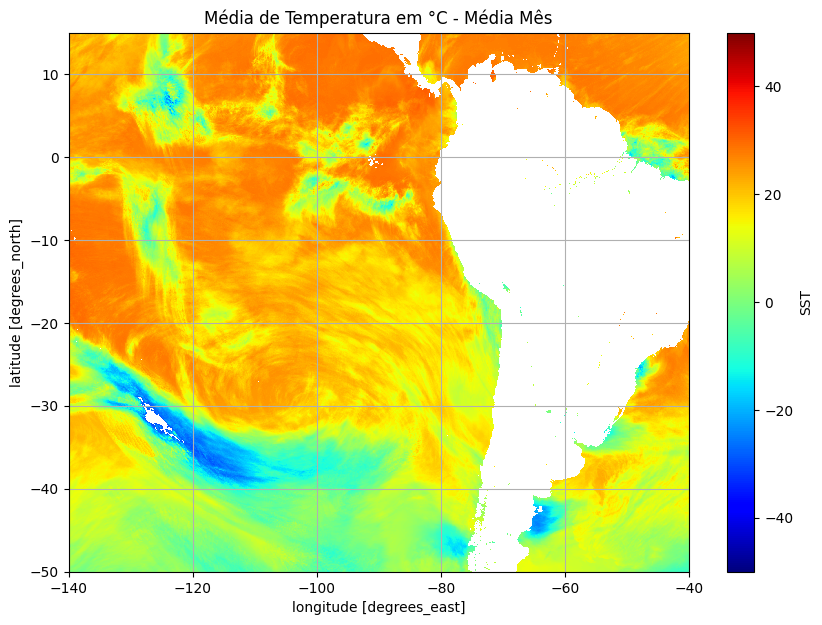

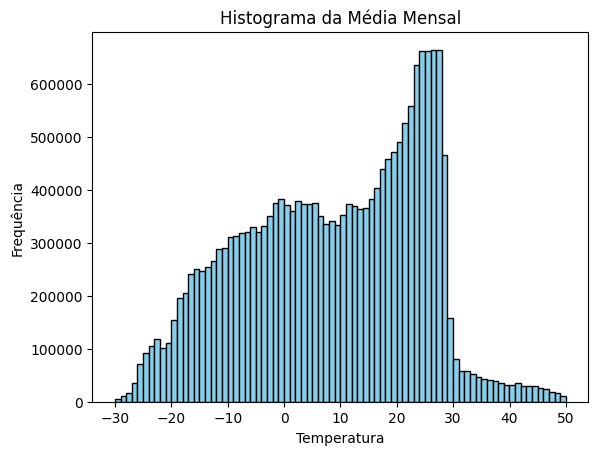

7517

In [13]:
import gc
import rioxarray as rxr
import numpy as np
import pandas as pd
import os
import xarray as xr
from glob import glob
from pathlib import Path
import matplotlib.pyplot as plt
import netCDF4

nc = xr.open_dataset("/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_mensal/media_mes_02.nc")
sst_mes=nc['SST']

# Now you can plot the DataArray
plt.figure(figsize=(10, 7))
sst_mes.plot(cmap='jet')
plt.title('Média de Temperatura em °C - Média Mês')
plt.grid(True)
plt.xlim(-140, -40)
plt.ylim(-50, 15)
plt.savefig(f'MediaMensal.png')
plt.show()

plt.hist(sst_mes.values.flatten(), bins=80, color='skyblue', edgecolor='black')
plt.xlabel('Temperatura')
plt.ylabel('Frequência')
plt.title('Histograma da Média Mensal')
plt.savefig(f'Histograma.png')
plt.show()

plt.close()

 # Limpar a memória após salvar e plotar
#del stack_dados, media_mensal, da_media_mensal
gc.collect()

In [14]:
#organizar a lista em ordem
arqs = sorted(arqs)


#primeira semana

    # Função para salvar a média calculada em um arquivo NetCDF
def salvar_media(mes_ano, da_media_mensal, caminho_arquivo):
    da_media_mensal.to_netcdf(caminho_arquivo)

# Initialize an empty list to store DataArrays
lista_dados = []

for arq in arqs[0:7]:
    # Abrir o arquivo NetCDF
    dsTemp = rxr.open_rasterio(arq, chunks={'x': 600, 'y': 600})
    stack_dados = np.stack([da.values for da in dsTemp], axis=0)
    media_mensal = np.nanmean(stack_dados, axis=0)

media_mensal = xr.Dataset(
        {'SST': (['y', 'x'], media_mensal)},
        coords={'y': dsTemp[0].coords['y'], 'x': dsTemp[0].coords['x']},
        attrs={'units': '°C', 'scale_factor': 1.0, 'add_offset': 0.0}  # Removed 'EPSG': epsg
    )



    # Salvar a média em um arquivo NetCDF
caminho_arquivo = f'/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_semanal/media_primeira_semana_do_mes_{nome[9:11]}.nc'
salvar_media(nome, media_mensal, caminho_arquivo)

<ipython-input-14-d370faf50511>:18: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-14-d370faf50511>:18: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-14-d370faf50511>:18: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-14-d370faf50511>:18: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-14-d370faf50511>:18: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-14-d370faf50511>:18: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-14-d370faf50511>:18: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)


In [15]:
#segunda semana

    # Função para salvar a média calculada em um arquivo NetCDF
def salvar_media(mes_ano, da_media_mensal, caminho_arquivo):
    da_media_mensal.to_netcdf(caminho_arquivo)

# Initialize an empty list to store DataArrays
lista_dados = []

for arq in arqs[7:14]:
    # Abrir o arquivo NetCDF
    dsTemp = rxr.open_rasterio(arq, chunks={'x': 600, 'y': 600})
    stack_dados = np.stack([da.values for da in dsTemp], axis=0)
    media_mensal = np.nanmean(stack_dados, axis=0)

media_mensal = xr.Dataset(
        {'SST': (['y', 'x'], media_mensal)},
        coords={'y': dsTemp[0].coords['y'], 'x': dsTemp[0].coords['x']},
        attrs={'units': '°C', 'scale_factor': 1.0, 'add_offset': 0.0}  # Removed 'EPSG': epsg
    )



    # Salvar a média em um arquivo NetCDF
caminho_arquivo = f'/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_semanal/media_segunda_semana_do_mes_{nome[9:11]}.nc'
salvar_media(nome, media_mensal, caminho_arquivo)

<ipython-input-15-3ee99204b120>:20: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-15-3ee99204b120>:20: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-15-3ee99204b120>:20: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-15-3ee99204b120>:20: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-15-3ee99204b120>:20: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-15-3ee99204b120>:20: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-15-3ee99204b120>:20: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)


In [16]:
#terceira semana

    # Função para salvar a média calculada em um arquivo NetCDF
def salvar_media(mes_ano, da_media_mensal, caminho_arquivo):
    da_media_mensal.to_netcdf(caminho_arquivo)

# Initialize an empty list to store DataArrays
lista_dados = []

for arq in arqs[14:21]:
    # Abrir o arquivo NetCDF
    dsTemp = rxr.open_rasterio(arq, chunks={'x': 600, 'y': 600})
    stack_dados = np.stack([da.values for da in dsTemp], axis=0)
    media_mensal = np.nanmean(stack_dados, axis=0)

media_mensal = xr.Dataset(
        {'SST': (['y', 'x'], media_mensal)},
        coords={'y': dsTemp[0].coords['y'], 'x': dsTemp[0].coords['x']},
        attrs={'units': '°C', 'scale_factor': 1.0, 'add_offset': 0.0}  # Removed 'EPSG': epsg
    )



    # Salvar a média em um arquivo NetCDF
caminho_arquivo = f'/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_semanal/media_terceira_semana_do_mes_{nome[9:11]}.nc'
salvar_media(nome, media_mensal, caminho_arquivo)

<ipython-input-16-5ebc67726b4e>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-16-5ebc67726b4e>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-16-5ebc67726b4e>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-16-5ebc67726b4e>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-16-5ebc67726b4e>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-16-5ebc67726b4e>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-16-5ebc67726b4e>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)


In [17]:
#quarta semana

# Função para salvar a média calculada em um arquivo NetCDF
def salvar_media(mes_ano, da_media_mensal, caminho_arquivo):
    da_media_mensal.to_netcdf(caminho_arquivo)

# Initialize an empty list to store DataArrays
lista_dados = []

for arq in arqs[21:28]:
    # Abrir o arquivo NetCDF
    dsTemp = rxr.open_rasterio(arq, chunks={'x': 600, 'y': 600})
    stack_dados = np.stack([da.values for da in dsTemp], axis=0)
    media_mensal = np.nanmean(stack_dados, axis=0)

media_mensal = xr.Dataset(
        {'SST': (['y', 'x'], media_mensal)},
        coords={'y': dsTemp[0].coords['y'], 'x': dsTemp[0].coords['x']},
        attrs={'units': '°C', 'scale_factor': 1.0, 'add_offset': 0.0}  # Removed 'EPSG': epsg
    )



    # Salvar a média em um arquivo NetCDF
caminho_arquivo = f'/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_semanal/media_quarta_semana_do_mes_{nome[9:11]}.nc'
salvar_media(nome, media_mensal, caminho_arquivo)

<ipython-input-17-4547126c5786>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-17-4547126c5786>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-17-4547126c5786>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-17-4547126c5786>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-17-4547126c5786>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-17-4547126c5786>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)
<ipython-input-17-4547126c5786>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)


In [18]:
#quinta semana

   # Função para salvar a média calculada em um arquivo NetCDF
def salvar_media(mes_ano, da_media_mensal, caminho_arquivo):
    da_media_mensal.to_netcdf(caminho_arquivo)

# Initialize an empty list to store DataArrays
lista_dados = []

for arq in arqs[28:32]:
    # Abrir o arquivo NetCDF
    dsTemp = rxr.open_rasterio(arq, chunks={'x': 600, 'y': 600})
    stack_dados = np.stack([da.values for da in dsTemp], axis=0)
    media_mensal = np.nanmean(stack_dados, axis=0)

media_mensal = xr.Dataset(
        {'SST': (['y', 'x'], media_mensal)},
        coords={'y': dsTemp[0].coords['y'], 'x': dsTemp[0].coords['x']},
        attrs={'units': '°C', 'scale_factor': 1.0, 'add_offset': 0.0}  # Removed 'EPSG': epsg
    )



    # Salvar a média em um arquivo NetCDF
caminho_arquivo = f'/content/drive/MyDrive/Produtos_GOES/noaa-goes16/media_semanal/media_quinta_semana_do_mes_{nome[9:11]}.nc'
salvar_media(nome, media_mensal, caminho_arquivo)

<ipython-input-18-c01d1c73380e>:14: RuntimeWarning: Mean of empty slice
  media_mensal = np.nanmean(stack_dados, axis=0)


In [ ]:
!mv /content/ /content/drive/MyDrive/

mv: cannot move '/content/drive/Shareddrives' to '/content/drive/MyDrive/content/drive/Shareddrives': No such file or directory
mv: cannot move '/content/drive/.shortcut-targets-by-id' to '/content/drive/MyDrive/content/drive/.shortcut-targets-by-id': Operation not supported
mv: cannot move '/content/drive/.file-revisions-by-id' to '/content/drive/MyDrive/content/drive/.file-revisions-by-id': Operation not supported
mv: cannot move '/content/' to a subdirectory of itself, '/content/drive/MyDrive/content'
